# Chapter 9 - Navigation Lights

_Copyright @2022 p6steve, please see Chapter 1 for Terms of Use_

As you may have noticed in the preceeding chapters, our Physics::Navigation Buoys classes are each set up with specific flashing light sequences. In this chapter, we can see how these characteristics can be used to portray night-time navigation.

First, the usual preamble... and let's predefine some navigation buoy objects:

In [1]:
use Physics::Navigation;
use Physics::Measure;
use Math::Polygons;

my $pos-A = Position.new( ♓️<51.5072°N>, ♓️<0.1193°W> );  say "$pos-A";
my $pos-B = Position.new( ♓️<51.5054°N>, ♓️<0.1276°W> );  say "$pos-B";
my $pos-C = Position.new( ♓️<51.5054°N>, ♓️<0.1110°W> );  say "$pos-C";
my $pos-D = Position.new( ♓️<51.5036°N>, ♓️<0.1276°W> );  say "$pos-D";

$IALA = A;    say "IALA: $IALA";

(51°30.432′N, 000°7.158′W)
(51°30.324′N, 000°7.656′W)
(51°30.324′N, 000°6.66′W)
(51°30.216′N, 000°7.656′W)
IALA: A


## Disclaimer

As with the other Chapters, this jupyter notebook is provided for illustrative purposes and it does NOT seek to be a definitive guide. It only covers a subset of the IALA standards as described on [Wikipedia](https://en.wikipedia.org/wiki/International_Association_of_Marine_Aids_to_Navigation_and_Lighthouse_Authorities#IALA_sea_mark_regions). 

DO NOT RELY ON THIS INFORMATION FOR REAL NAVIGATION PURPOSES.

## Light Characteristic
A light characteristic is a graphic and text description of a navigational light sequence or colour displayed on a nautical chart.

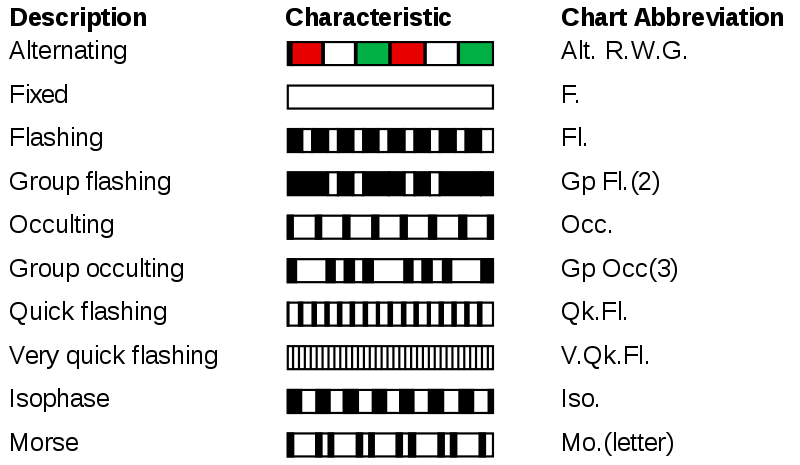

## class Circle does Animated role

Sadly the Math::Polygons module does not include an animated Circle class. We need an animated one to display our flashing light examples. Luckily we can make our own.

Did I say Animated, oh we also need to make a method for that! 

In [2]:
class A-Circle does Element does Styled {
    has $.centre = Point.new(200,100);
    has $.radius = 15;
    has @.pattern;
    has $.duration;

    method animate {
        animate => [ attributeName => "fill",   values => @.pattern.join(';'),
                     dur => ($.duration ~ "s"), repeatCount => "indefinite" ];
    }
    
    method serialize {
        circle => [ cx => $.centre.x, cy => $.centre.y, r => $.radius, 
                      self.animate, |self.styles ];
    }
}

(A-Circle)

## LightShaped role

And we will need a role to apply to our buoy object.

In [3]:
role LightShaped {

    sub make-bgnd {
        my $stroke := my $fill = "black";
        my $width = 1024; my $height = 768;
        
        Rectangle.new( :$width , :$height, :$stroke, :$fill, origin => Point.new(0,0) );
    }

    method elements {
        my $bg = make-bgnd;
        
        my $light = A-Circle.new( stroke => "black", 
                        pattern  => $.light-svg.pattern, 
                        duration => $.light-svg.duration );

        [ $bg, $light, ]
    }
}

(LightShaped)

## Define our Buoys
Now to define some buoys as in previous chapters, but with a little more emphasis on the lighting.

In [4]:
my $ncm = NorthCardinal.new( position => $pos-A );  
say $ncm.light-defn;
say "$ncm";

Q
NorthCardinal Buoy at (51°30.432′N, 000°7.158′W)
Colours:Black,Yellow. Shapes:Up,Up. Outline:None. Pattern:Layers.
Flashes quickly



In [5]:
my $slm = StarboardLateral.new( position => $pos-B );  
say $slm.light-defn;
say "$slm";

Fl.G5s
StarboardLateral Buoy at (51°30.324′N, 000°7.656′W)
Colours:Green. Shapes:. Outline:Cone. Pattern:Solid.
Flashes green every 5 seconds



In [6]:
my $scm = SouthCardinal.new( position => $pos-C );  
say $scm.light-defn;
say "$scm";

Q(6)+L Fl.15s
SouthCardinal Buoy at (51°30.324′N, 000°6.66′W)
Colours:Yellow,Black. Shapes:Down,Down. Outline:None. Pattern:Layers.
Flashes quickly 6 times plus one long every 15 seconds



Each raku Physics::Navigation Buoy leaf class is pre-loaded with the light characteristic code described above (accessed via method ```.light-defn```).

The .Str function calls a raku Grammar to interpret the code and convert it to an English sentence.

## Let's Pick One...

The ```.light-svg``` function returns an SVG-animation object that can be checked to get the overall duration (in seconds) and the light pattern in a format that can be fed to an SVG animate attribute.

In [7]:
my $cm := $slm;
say $cm.light-svg.^name;
say $cm.light-svg.Str;

Physics::Navigation::SVG-animation
duration is 5;
 pattern is <#0f0 #000 #000 #000 #000 #000>;




## ... and Draw It

StarboardLateral+{LightShaped} Buoy at (51°30.324′N, 000°7.656′W)
Colours:Green. Shapes:. Outline:Cone. Pattern:Solid.
Flashes green every 5 seconds



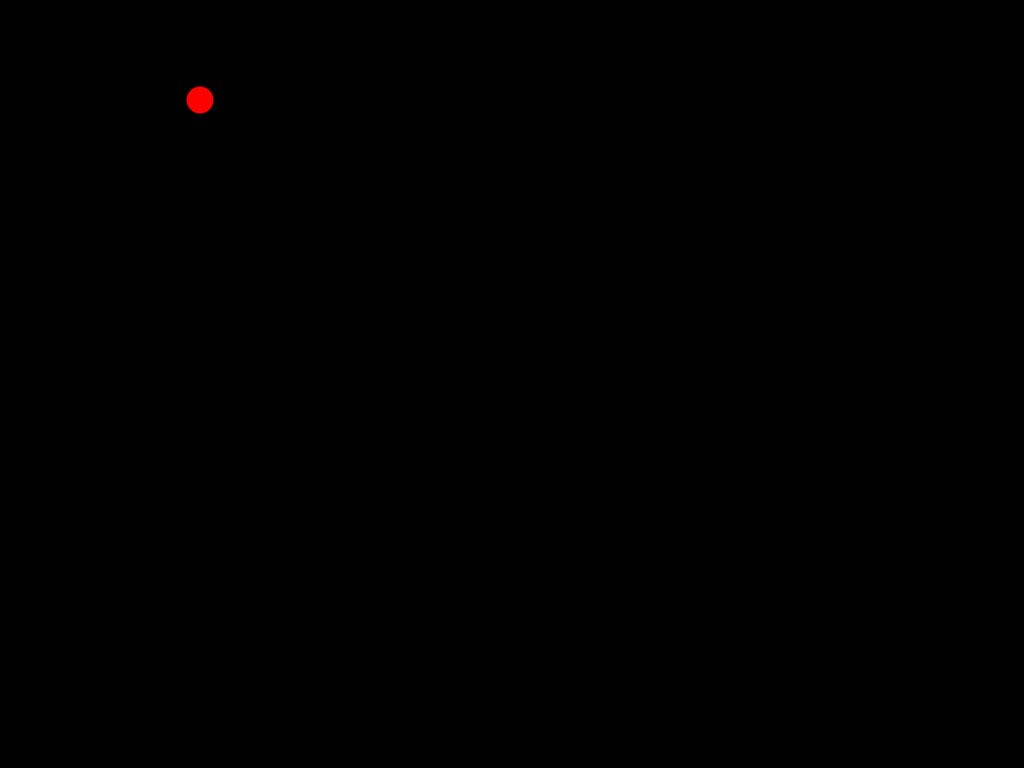

Trapped interrupt.  Please restart the kernel to abort execution.
Exiting Raku kernel (you may close client)


In [8]:
$cm does LightShaped;
"$cm".say;

my $drawing = Drawing.new( elements => $cm.elements );
$drawing.serialize.say;

## Your Contribution

If you have enjoyed this introduction to raku Physics::Navigation, there is a lot of work to do to extend and enhance this library. Visit https://github.com/p6steve/raku-Physics-Navigation.git if you are interested to find out how you can help.

Or feel free to email me at p6steve@furnival.net.